In [1]:
# ch 4 page 163 - implement MNIST from scratch using all digits

In [2]:
from fastbook import *

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
path

Path('/Users/rnm/.fastai/data/mnist_png')

In [5]:
path.ls()

(#3) [Path('/Users/rnm/.fastai/data/mnist_png/.DS_Store'),Path('/Users/rnm/.fastai/data/mnist_png/training'),Path('/Users/rnm/.fastai/data/mnist_png/testing')]

In [7]:
Path.BASE_PATH = path
path.ls()

(#3) [Path('.DS_Store'),Path('training'),Path('testing')]

In [8]:
!ls {path}/'training/3' | wc -l

    6131


In [9]:
!ls {path}/'training'

0 1 2 3 4 5 6 7 8 9


In [10]:
DIGITS = range(0, 10)

In [11]:
train_digit_paths = [(path/'training'/str(digit)).ls().sorted()
                        for digit in DIGITS]
valid_digit_paths = [(path/'testing'/str(digit)).ls().sorted()
                        for digit in DIGITS]

In [12]:
Image.open(train_digit_paths[9][-1])

In [14]:
for d in DIGITS:
    print('Train', d, len(train_digit_paths[d]))
for d in DIGITS:
    print('Valid', d, len(valid_digit_paths[d]))

Train 0 5923
Train 1 6742
Train 2 5958
Train 3 6131
Train 4 5842
Train 5 5421
Train 6 5918
Train 7 6265
Train 8 5851
Train 9 5949
Valid 0 980
Valid 1 1135
Valid 2 1032
Valid 3 1010
Valid 4 982
Valid 5 892
Valid 6 958
Valid 7 1028
Valid 8 974
Valid 9 1009


In [36]:
len(torch.cat([tensor([d] * len(train_digit_paths[d])) for d in DIGITS]))

60000

In [21]:
'''train_x = [torch.stack([tensor(Image.open(img))
                          for img in train_digit_paths[d]])
                          for d in [3,7]]
type(train_x), train_x[1].shape'''

In [23]:
train_x = torch.cat([torch.stack([tensor(Image.open(img))
                          for img in train_digit_paths[d]])
                          for d in DIGITS]).view(-1, 28*28).float()/255
valid_x = torch.cat([torch.stack([tensor(Image.open(img))
                          for img in train_digit_paths[d]])
                          for d in DIGITS]).view(-1, 28*28).float()/255
train_x.shape, valid_x.shape

(torch.Size([60000, 784]), torch.Size([60000, 784]))

(torch.Size([28, 28]), <AxesSubplot:>)

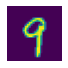

In [28]:
train_x[0].view(28,28).shape, show_image(train_x[-1].view(28,28))

In [37]:
train_y = torch.cat([tensor([d] * len(train_digit_paths[d])) for d in DIGITS]).unsqueeze(1)
valid_y = torch.cat([tensor([d] * len(valid_digit_paths[d])) for d in DIGITS]).unsqueeze(1)

In [38]:
train = list(zip(train_x, train_y))
valid = list(zip(valid_x, valid_y))

x, y = train[-1]
print(x.shape, y.shape)

torch.Size([784]) torch.Size([1])


In [43]:
def init_parms(size, var=1.0):
    std = math.sqrt(var) # torch.exp(var ** 0.5)
    return (torch.randn(size)*std).requires_grad_()

In [45]:
# initialze parameters
weights = init_parms((28*28, 1), 1.) # note 2 parens - all get assigned to size
bias = init_parms(1)
print(weights.shape, bias.shape)

torch.Size([784, 1]) torch.Size([1])


In [48]:
# define hidden linear layer
def linear1(x):
    return x@weights + bias

preds = linear1(train_x)
preds

tensor([[ 9.4907],
        [-3.8088],
        [ 9.7050],
        ...,
        [-0.3274],
        [ 8.3987],
        [-8.9431]], grad_fn=<AddBackward0>)

In [49]:
# define loss func as softmax (cross-entropy)
def loss_func(x):
    return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [50]:
# check if batching needed at atll - i.e. use entire dataset

In [53]:
# mini-batch desirable to fit into exisitng memory cpu/gpu and have reasonable runtime
# also permits iteration with shuffling
# need: item should be tuple of predictors and target
dl = DataLoader(train, batch_size=5, shuffle=True)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([5, 784]), torch.Size([5, 1]))

In [54]:
preds = linear1(xb)
preds

tensor([[-13.5760],
        [ -4.6685],
        [  8.7268],
        [  2.7404],
        [  5.9842]], grad_fn=<AddBackward0>)

In [55]:
loss = loss_func(preds, yb)
loss

TypeError: loss_func() takes 1 positional argument but 2 were given